In [3]:
import pyodbc
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
pd.options.mode.chained_assignment = None

In [5]:
data = pd.read_csv('vessel_information_1.csv')
data.drop(columns='IMO', inplace=True)
data.head(15)

,MainEngineKW,Deadweight,GrossRatedTonnage,Yearbuilt,Annual average Fuel consumption per distance [kg / n mile]
0,3360.0,12223,9094,1995,84.30
1,3360.0,12223,9094,1995,84.58
2,4080.0,8000,5045,1993,72.10
3,4080.0,8000,5045,1993,115.66
4,4080.0,8000,5045,1993,123.98
5,16859.0,148435,79832,1996,271.81
6,5400.0,10044,6877,1996,75.45
7,5400.0,10044,6877,1996,67.33
8,5400.0,10044,6877,1996,82.97
9,14004.0,106504,56127,1998,204.86


In [2]:
data = pd.read_csv('./MRV Data - 2018.csv')
data2 = pd.read_csv('./MRV Data - 2019.csv')
data3 = pd.read_csv('./MRV Data - 2020.csv')

FileNotFoundError: [Errno 2] No such file or directory: './MRV Data - 2018.csv'

In [ ]:
data = data[(data['Ship type']=='Oil tanker') 
            &(data['Total fuel consumption [m tonnes]'] > 0) 
            &(data['Total CO₂ emissions [m tonnes]'] > 0)]
data['Annual average Fuel consumption per transport work (mass) [g / m tonnes · n miles]'] =(
    data['Annual average Fuel consumption per transport work (mass) [g / m tonnes · n miles]']
    .apply(lambda x: np.nan if x=='Division by zero!' else x))
data['Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]'] = (
    data['Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]']
    .apply(lambda x: np.nan if x=='Division by zero!' else x))
data.rename(columns= {'IMO Number' : 'IMO'}, inplace=True)


data.dropna(subset=['Annual average Fuel consumption per transport work (mass) [g / m tonnes · n miles]', 
                    'Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]'], inplace = True)

#float 
data['Annual average Fuel consumption per distance [kg / n mile]'] = data['Annual average Fuel consumption per distance [kg / n mile]'].astype(float)
data['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'] = data['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'].astype(float)

data.head()

In [10]:
data2 = data2[(data2['Ship type']=='Oil tanker') 
            &(data2['Total fuel consumption [m tonnes]'] > 0) 
            &(data2['Total CO₂ emissions [m tonnes]'] > 0)]
data2['Annual average Fuel consumption per transport work (mass) [g / m tonnes · n miles]'] =(
    data2['Annual average Fuel consumption per transport work (mass) [g / m tonnes · n miles]']
    .apply(lambda x: np.nan if x=='Division by zero!' else x))
data2['Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]'] = (
    data2['Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]']
    .apply(lambda x: np.nan if x=='Division by zero!' else x))
data2.rename(columns= {'IMO Number' : 'IMO'}, inplace=True)


data2.dropna(subset=['Annual average Fuel consumption per transport work (mass) [g / m tonnes · n miles]', 
                    'Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]'], inplace = True)

#float 
data2['Annual average Fuel consumption per distance [kg / n mile]'] = data2['Annual average Fuel consumption per distance [kg / n mile]'].astype(float)
data2['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'] = data2['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'].astype(float)

#data2.head()

In [11]:
data3 = data3[(data3['Ship type']=='Oil tanker') 
            &(data3['Total fuel consumption [m tonnes]'] > 0) 
            &(data3['Total CO₂ emissions [m tonnes]'] > 0)]
data3['Annual average Fuel consumption per transport work (mass) [g / m tonnes · n miles]'] =(
    data3['Annual average Fuel consumption per transport work (mass) [g / m tonnes · n miles]']
    .apply(lambda x: np.nan if x=='Division by zero!' else x))
data3['Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]'] = (
    data3['Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]']
    .apply(lambda x: np.nan if x=='Division by zero!' else x))
data3.rename(columns= {'IMO Number' : 'IMO'}, inplace=True)


data3.dropna(subset=['Annual average Fuel consumption per transport work (mass) [g / m tonnes · n miles]', 
                    'Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]'], inplace = True)

#float 
data3['Annual average Fuel consumption per distance [kg / n mile]'] = data3['Annual average Fuel consumption per distance [kg / n mile]'].astype(float)
data3['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'] = data3['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'].astype(float)

#data3.head()

In [13]:
frames = [data, data2, data3]
merged_years = pd.concat(frames, axis = 0)

In [16]:
merged_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5579 entries, 404 to 11823
Data columns (total 61 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   IMO                                                                                                                      5579 non-null   int64  
 1   Name                                                                                                                     5579 non-null   object 
 2   Ship type                                                                                                                5579 non-null   object 
 3   Reporting Period                                                                                                         5579 non-null 

<AxesSubplot:>

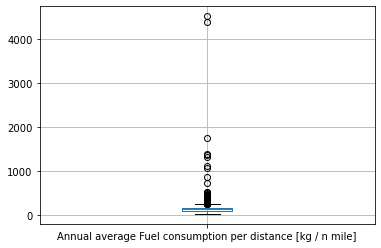

In [17]:
merged_years.boxplot('Annual average Fuel consumption per distance [kg / n mile]')

In [18]:
#drop outliers

merged_years.drop(merged_years.index[merged_years['Annual average Fuel consumption per distance [kg / n mile]'] > 400], inplace=True)

In [10]:
merged_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5548 entries, 404 to 11823
Data columns (total 61 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   IMO                                                                                                                      5548 non-null   int64  
 1   Name                                                                                                                     5548 non-null   object 
 2   Ship type                                                                                                                5548 non-null   object 
 3   Reporting Period                                                                                                         5548 non-null 

In [12]:
merged_years.to_csv('./merged_datasets.csv', index=False)

In [19]:
avg_cons_per_distance = merged_years[['IMO', 'Annual average Fuel consumption per distance [kg / n mile]']]
avg_cons_per_distance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5548 entries, 404 to 11823
Data columns (total 2 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   IMO                                                         5548 non-null   int64  
 1   Annual average Fuel consumption per distance [kg / n mile]  5548 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 130.0 KB


<AxesSubplot:>

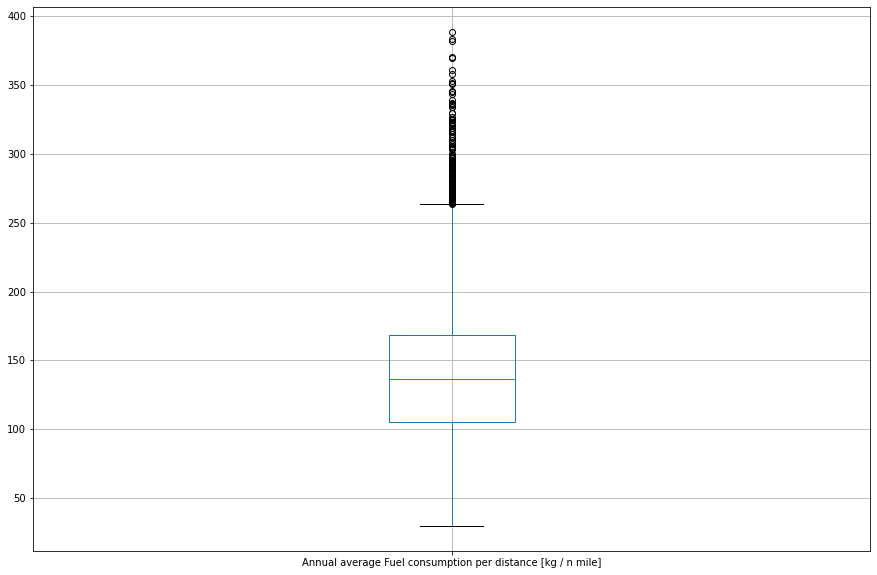

In [20]:
plt.figure(figsize = (15, 10))
avg_cons_per_distance.boxplot('Annual average Fuel consumption per distance [kg / n mile]')

In [21]:
avg_cons_per_distance.info()
avg_cons_per_distance.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5548 entries, 404 to 11823
Data columns (total 2 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   IMO                                                         5548 non-null   int64  
 1   Annual average Fuel consumption per distance [kg / n mile]  5548 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 130.0 KB


IMO                                                           0
Annual average Fuel consumption per distance [kg / n mile]    0
dtype: int64

In [16]:
##
##
##
##
### Was connecting to the databases to get some missing info. Code deleted

In [17]:
columns = ['IMO', 'Main Engine KW','Deadweight', 
           'Gross Rated Tonnage', 'YearBuilt']
vessel_info = pd.DataFrame(columns=columns)
imolist = avg_cons_per_distance.IMO.tolist()
print(len(imolist))
coma_list = ','.join([str(i) for i in imolist])

5563


In [18]:
vessel_info = get_vessel_info(coma_list)

In [19]:
vessel_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IMO                2597 non-null   int64  
 1   MainEngineKW       2340 non-null   float64
 2   Deadweight         2597 non-null   int64  
 3   GrossRatedTonnage  2597 non-null   int64  
 4   Yearbuilt          2597 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 101.6 KB


In [2]:
vessel_info.to_csv('./vessel_information.csv', index=False)

NameError: name 'vessel_info' is not defined

In [39]:
vessel_info_1 = pd.merge(vessel_info_1, avg_cons_per_distance, how = 'left', on=['IMO'])
vessel_info_1.dropna(subset=['MainEngineKW', 'Annual average Fuel consumption per distance [kg / n mile]'], inplace = True)

In [40]:
vessel_info_1.info()
#vessel_info_1.max()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4929 entries, 0 to 5483
Data columns (total 6 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   IMO                                                         4929 non-null   int64  
 1   MainEngineKW                                                4929 non-null   float64
 2   Deadweight                                                  4929 non-null   int64  
 3   GrossRatedTonnage                                           4929 non-null   int64  
 4   Yearbuilt                                                   4929 non-null   int64  
 5   Annual average Fuel consumption per distance [kg / n mile]  4929 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 269.6 KB


In [27]:
vessel_info_1.nunique()

IMO                                                           2340
MainEngineKW                                                   416
Deadweight                                                    1731
GrossRatedTonnage                                             1091
Yearbuilt                                                       27
Annual average Fuel consumption per distance [kg / n mile]    4248
dtype: int64

In [3]:
vessel_info_1.to_csv('./vessel_information_1.csv', index=False)

NameError: name 'vessel_info_1' is not defined

In [38]:
vessel_info_1 = pd.read_csv('./vessel_information.csv')


In [7]:
vessel_info_1

,IMO,MainEngineKW,Deadweight,GrossRatedTonnage,Yearbuilt
0,8905787,3360.0,12223,9094,1995
1,9010929,4080.0,8000,5045,1993
2,9114608,16859.0,148435,79832,1996
3,9125279,5400.0,10044,6877,1996
4,9144794,14004.0,106504,56127,1998
...,...,...,...,...,...
2592,9868778,13450.0,114900,62000,2020
2593,9871012,6560.0,37430,23420,2019
2594,9874210,24330.0,302000,157208,2020
2595,9878838,24500.0,299772,154046,2020


KeyError: "None of [Index(['Annual average Fuel consumption per distance [kg / n mile]'], dtype='object')] are in the [columns]"

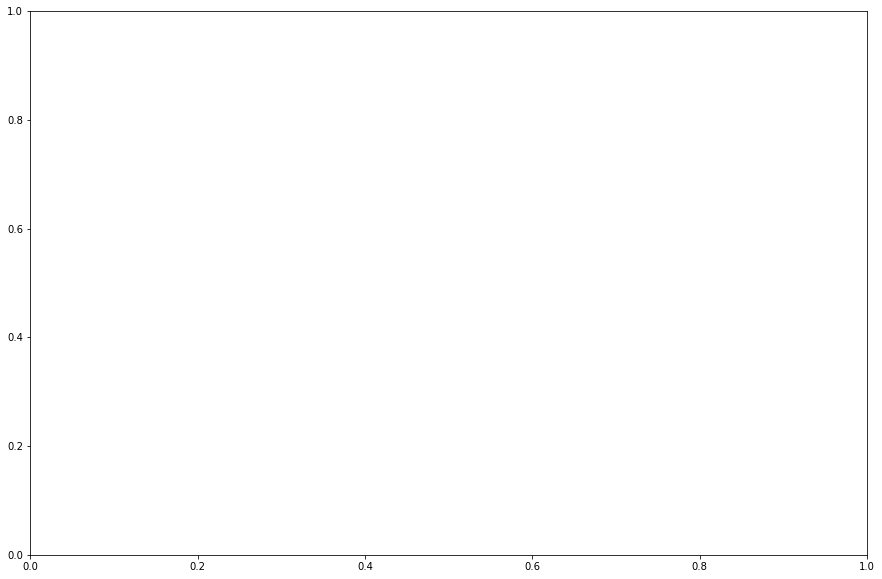

In [6]:
plt.figure(figsize = (15, 10))
vessel_info_1.boxplot('Annual average Fuel consumption per distance [kg / n mile]')

In [125]:
vessel_info_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4941 entries, 0 to 5492
Data columns (total 6 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   IMO                                                         4941 non-null   int64  
 1   MainEngineKW                                                4941 non-null   float64
 2   Deadweight                                                  4941 non-null   int64  
 3   GrossRatedTonnage                                           4941 non-null   int64  
 4   Yearbuilt                                                   4941 non-null   int64  
 5   Annual average Fuel consumption per distance [kg / n mile]  4941 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 270.2 KB


In [49]:
vessel_info_1.head()

,IMO,MainEngineKW,Deadweight,GrossRatedTonnage,Yearbuilt,Annual average Fuel consumption per distance [kg / n mile]
0,8905787,3360.0,12223,9094,1995,84.30
1,8905787,3360.0,12223,9094,1995,84.58
2,9010929,4080.0,8000,5045,1993,72.10
3,9010929,4080.0,8000,5045,1993,115.66
4,9010929,4080.0,8000,5045,1993,123.98


In [41]:
#y = data['Annual average Fuel consumption per distance [kg / n mile]'].values
y = vessel_info_1['Annual average Fuel consumption per distance [kg / n mile]'].values

x = vessel_info_1.drop(['Annual average Fuel consumption per distance [kg / n mile]', 'IMO'], axis = 1).values

### Linear Model

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

ml = LinearRegression()
ml.fit(x_train, y_train)
y_pred_linear = ml.predict(x_test)

r2_score(y_test, y_pred_linear)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [54]:
import joblib
filename = 'finalized_lin_model.sav'
joblib.dump(ml, filename)

['finalized_lin_model.sav']

In [56]:
import joblib
filename = 'finalized_lin_model.pkl'
joblib.dump(ml, filename)

['finalized_lin_model.pkl']

In [55]:
ml.predict([[3336, 12223, 9094, 1996]])

array([124.08949502])

Text(0, 0.5, 'Predicted')

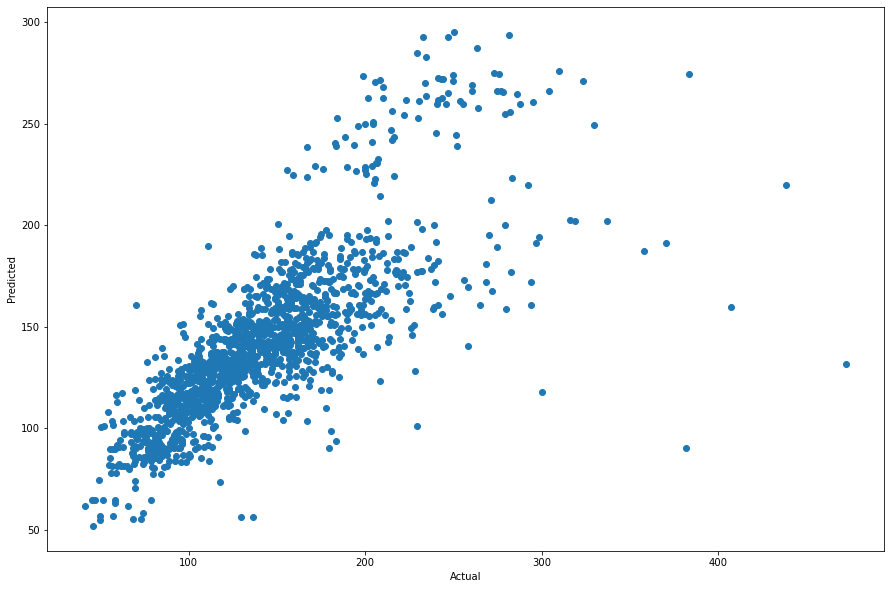

In [40]:

plt.figure(figsize = (15, 10))
plt.scatter(y_test, y_pred_linear)
plt.xlabel('Actual')
plt.ylabel('Predicted')

### Polyonomial Model

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [43]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)


LinearRegression()

In [44]:
y_pred_poly = pol_reg.predict(poly_reg.fit_transform(x_test))

In [45]:
r2_score(y_test, y_pred_poly)

0.6539989432390217

Text(0, 0.5, 'Predicted')

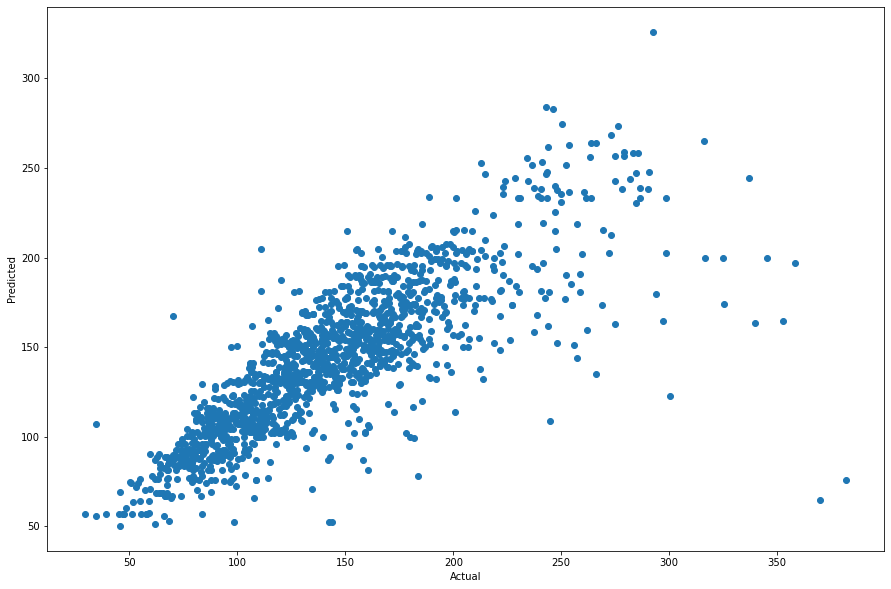

In [46]:
plt.figure(figsize = (15, 10))
plt.scatter(y_test, y_pred_poly)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [48]:
import pickle
import joblib
filename = 'finalized_poly_model.sav'
joblib.dump(pol_reg, filename)

['finalized_poly_model.sav']

In [162]:
pred_y_poly_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value':y_pred_poly, 'Difference': y_test - y_pred_poly})
pred_y_poly_df[0:30]

,Actual Value,Predicted Value,Difference
0,87.62,75.639318,11.980682
1,113.25,106.126232,7.123768
2,113.64,141.324968,-27.684968
3,135.01,129.225364,5.784636
4,184.97,171.095716,13.874284
5,137.60,118.117778,19.482222
6,191.95,137.569743,54.380257
7,143.92,155.275328,-11.355328
8,133.60,132.114535,1.485465
9,157.78,184.380379,-26.600379
